В рамках второго домашнего задания вам необходимо построить модифицированную модель распространения продукта по Бассу. Для реализации модели используется библиотека PySD, примеры использования которой были разобраны ранее.

Классическая модель Басса была реализована нами совместно на семинаре. Модификация модели заключена в следующем:

Добавить конкурирующую компанию (еще один контейнер), по аналогии с исходной (привлечение клиентов через прямую рекламу и «сарафанное радио»).
Клиенты после привлечения любой из компаний могут разочароваться и снова вернуться на рынок потенциальных клиентов (вероятность разочарования – новый параметр модели). Таким образом, имеется обратный поток клиентов в контейнер потенциальных клиентов.

Привлеченные клиенты одной компании могут напрямую воздействовать на клиентов конкурента, переманивая их в свою компанию (еще два новых параметра: уровень толерантности, т.е. восприимчивости, выраженный в форме вероятности перехода к конкуренту при контакте с его клиентами, а также уровень агрессивности привлечения, выраженный в форме вероятности прямой рекламы клиентам конкурента).

Комментарий. Очевидно, что при такой модификации все привлеченные клиенты у каждой из компаний делятся на три группы: довольные, нейтральные, недовольные. Первые осуществляют «сарафанное радио» и агрессивную рекламу, но сами не восприимчивы к агрессивной рекламе со стороны конкурента, а также не возвращаются в контейнер потенциальных клиентов. Вторые не осуществляют ни «сарафанное радио», ни агрессивную рекламу, сами при этом восприимчивы к агрессивной рекламе со стороны конкурента, но не возвращаются в контейнер потенциальных клиентов (то есть могут быть только переманены конкурентом и не помогают текущей компании). Третьи такие же, как и вторые, но могут вернуться в контейнер потенциальных клиентов.

### Пункты задания:

Реализовать модифицированную модель Басса. (максимум 2 балла при правильной реализации)

Оценить сходимость модели, т.е. устойчивость пропорции распределения клиентов. (максимум 4 балла при правильной реализации)

Варьированием параметров модели $(p_{11}, p_{13}, p_{21}, p_{23}$), получить обучающую и проверочную выборки для построения ML модели. Общую численность людей, а также «человеческие» параметры такие, как частота контактов, восприимчивость, агрессивность остаются постоянными, варьируем только параметры, характеризующие компании, но не людей. Построить ML модель, предсказывающую предельную пропорцию распределения клиентов по начальным параметрам.

Для полученной функции доли рынка выберите произвольную точку в образе и, анализируя обратную функцию при варьировании параметров $p_{11}$ и $p_{13},$ найдите в прообразе область соответствующую этой же доли рынка с максимальным отклонением $\pm 7\%.$ Аналитическое построение обратной функции дает полный балл за этот пункт задания. (максимум 4 балла при правильной реализации)

### Экономические параметры:

Довольствие клиента обходится компании в 100 у.е. капитальных затрат на каждую сотню довольных клиентов (ступенчатая функция) и плюс 5 у.е. за каждого довольного клиента. Нейтральные клиенты обходятся в 1 у.е. за каждого нейтрального клиента. Недовольные клиенты обходятся в 4 у.е. за каждого недовольного.

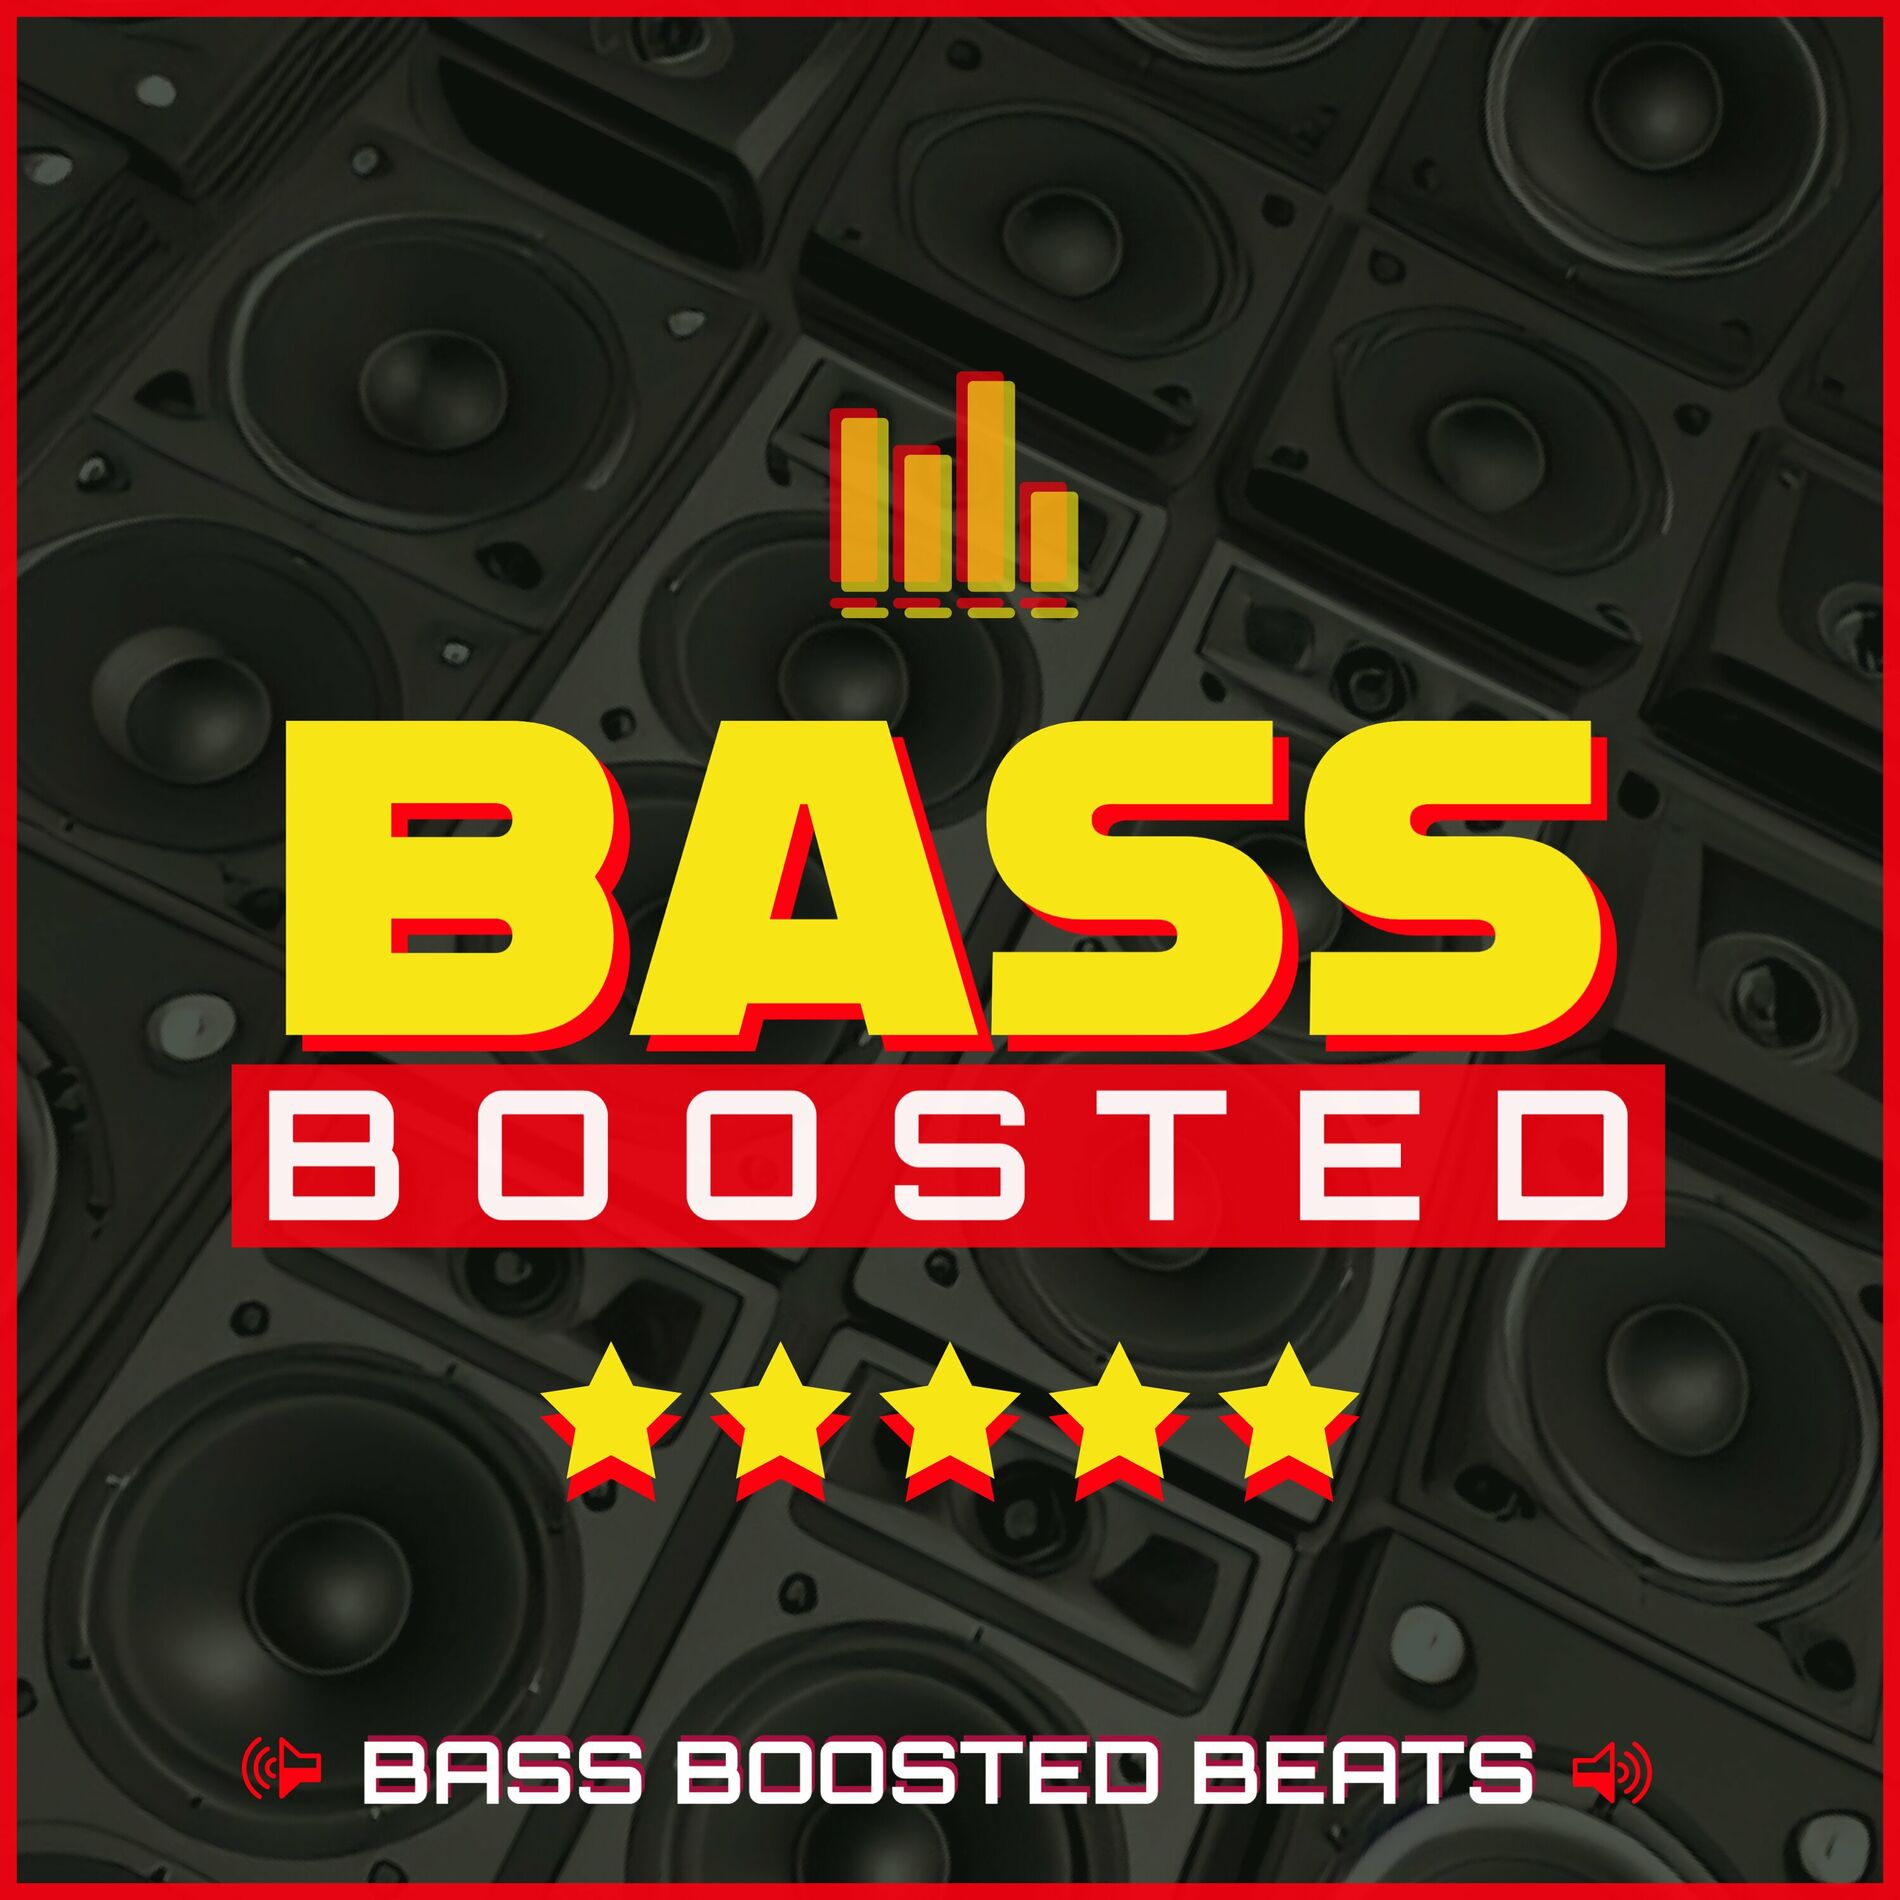

# Реализация модели

описана в файле bass.py

Проверим работоспособность реализации

In [ ]:
%pip install pysd
import os
import pysd
import numpy as np
import pandas as pd

from tqdm import tqdm
from multiprocessing import Pool
import matplotlib.pyplot as plt
from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.8/856.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.5 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=cd663a79252371a0365feee387f7696bed2b7a1bf561b4cdafb412160898a9db
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [ ]:
model = pysd.load('./bass.py')

In [ ]:
params= {
    "FINAL TIME": 1000,
    "p11": 0.4,
    "p13": 0.2,
    "p21": 0.3,
    "p23": 0.1}

return_columns=['Our customers', 'Competitor Customers', 'Potential Customers']

<Axes: xlabel='time'>

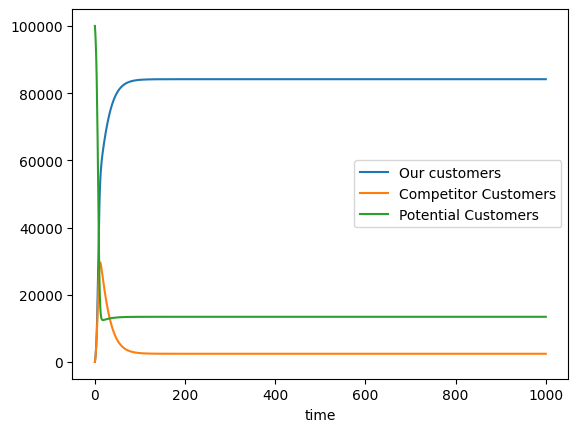

In [ ]:
result = model.run(params, return_columns)
result.plot()

По графику уже есть надежда, что модель написана правильна и довольно быстро сходится

# Оценка сходимости

Используем аналог критерия равномерной сходимости:

ряд $X=\{x_0, \ldots, x_T, \ldots \}$ будем считать сходящимся в момент времени $T$, если $|x_T-x_{T-i}| < \varepsilon$ для $i \in \{1, \ldots, 10\}$ и $\varepsilon =0.001.$


Пусть доли клиентов в нашей и конкурентской компаниях в момент времени $t$ равны $M_1(t)$ и $M_2(t)$ соответственно. Найдём первый момент времени, когда эти количества сходятся в соответствии с нашим определением. Заметим, что тогда и доля потенциальных клиентов тоже сходится, потому что равно разность общего числа людей и наших с конкурентом клиентов.



Оценим сходимость модели, то есть устойчивость пропорции распределения, оставляя только сходящиеся:

In [ ]:
Total = 1e5 # общая численность людей 100000, от этого будем возвращать доли

In [ ]:
def get_equilibrium(values, eps=1e-3):
    """
    Method that computes market segmentation for a given model run
    """
    labels = ['Potential Customers', 'Our customers', 'Competitor Customers']
    new_labels = []
    new_values = values.copy()
    for label in labels:
        for offset in range(1, 11): #i from 1 to 10 in our definition
            new_label = f"{label} - {offset}"
            new_labels.append(new_label)
            new_values[new_label] = values[label].diff(periods=offset).abs()
    diffs = new_values[new_labels]
    converged = values[(diffs < eps).all(axis='columns')]
    if converged.empty:
        return None, None
    M1, M2 = converged[labels[1:]].iloc[0] / Total
    return M1, M2

In [ ]:
def run_model(model, params=None, return_columns=None):
    model.reload()
    kwargs = {}
    if params is not None:
        kwargs['params'] = params
    values = model.run(**kwargs)
    return values

In [ ]:
def simulate(p11, p13, p21, p23, final_time=1000):
    """
    Method that runs simulation with given values
    of P11, P13, P21, and P23.
    """
    config = {
        "final_time": final_time,
        "p11": p11,
        "p13": p13,
        "p21": p21,
        "p23": p23,
        "efficiency_word_of_mouth": 0.015,
        "efficiency_marketing": 0.011,
        "sociability": 100
    }
    values = run_model(model, params=config)
    equilibrium = get_equilibrium(values)
    return np.array(equilibrium)

def simulate_wrapper(args):
    return simulate(*args)

In [ ]:
def generate_grid(step=0.1, preferences=None):
    """
    Method that generates a grid of P11, P13, P21, P23. Can forced to compute
    the grid within a certain interval for each P.
    """
    if preferences is None:
        preferences = [[0, 1]] * 4
    preferences = np.array(preferences)
    assert preferences.shape == (4, 2), "Preferences is list of list of elements with two items: lower and upper bound for P"
    space = [np.arange(pref[0], pref[1] + step, step) for pref in preferences]
    grid = np.array(np.meshgrid(*space, indexing='ij')).T.reshape(-1, 4)
    labels =  ["P11", "P13", "P21", "P23", "S1", "S2"]
    df = pd.DataFrame(data=grid, columns=labels[:4])
    temp = pd.DataFrame(data=np.zeros((len(df), 2)), columns=labels[4:])
    for idx, label in enumerate(labels[4:]):
        temp[label] = df[labels[idx * 2]] + df[labels[idx * 2 + 1]]
    df = df[(temp <= 1.).all(axis='columns')].reset_index(drop=True)
    return df

In [ ]:
def get_mapping(df):
    """
    Method that computes equilibrium of a system with a given
    set of P11, P13, P21, P23. Uses multiple processes to increase
    the speed
    """
    work = [[r["P11"], r["P13"], r["P21"], r["P23"]] for _, r in df.iterrows()]
    with Pool(max(os.cpu_count() - 1, 1)) as p:
        ground_truth = list(tqdm(p.imap(simulate_wrapper, work), total=len(work)))
    targets = pd.DataFrame(data=ground_truth, columns=["M1", "M2"])
    return targets

In [ ]:
def compose_dataset(step=0.1, preferences=None, save=True):
    df = generate_grid(step=step, preferences=preferences)
    targets = get_mapping(df)
    dataset = pd.concat([df, targets], axis=1).fillna(value=np.nan)
    return dataset

In [ ]:
from matplotlib.pyplot import figure

def visualize(dataset, competitor_strategy, tol=1e-5):
    p21, p23 = competitor_strategy
    data = dataset[(abs(dataset["P21"] - p21) < tol) & (abs(dataset["P23"] - p23) < tol)]
    figure(figsize=(7, 6), dpi=80)
    plt.scatter(data["P11"], data["P13"], c=data["M1"], s=300)
    plt.xlabel("P11")
    plt.ylabel("P13")
    plt.colorbar()

In [ ]:
preferences = [[0, 1]] * 4
df = compose_dataset(step=0.1, preferences=preferences)

100%|██████████| 4356/4356 [11:52<00:00,  6.11it/s]


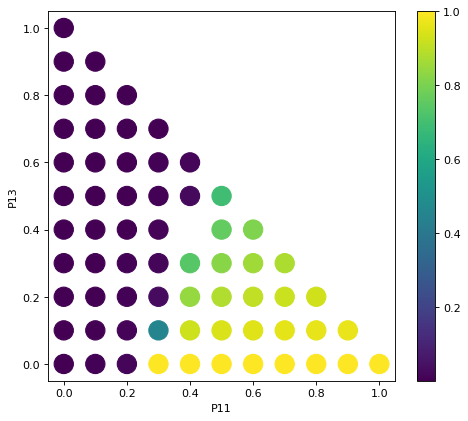

In [ ]:
visualize(df, [params["p21"], params["p23"]])

Итак, по введённому определению за время меньше 1000 модель сошлась при всех допустимых параметрах, находящихся в симплексе на рисунке выше (для p21, p23 аналогичный симплекс).

Также по результатам экспериментов видно, что функция возрастает при увеличении доли довольных клиентов и уменьшении доли недовольных. Это и так логично. Но ещё можно сразу прикинуть линии уровня искомой функции и использовать это для последнего пункта (построение области обратной функции)

# Построение ML модели

Для данной задачи логичным решением простой и при этом достаточно подходящей архитектуры является выбор модели случайного леса.

Модель случайного леса (Random Forest) является мощным алгоритмом машинного обучения, который относится к классу ансамблевых методов. Она основана на комбинации множества деревьев решений, каждое из которых строится на случайной выборке признаков и данных. Это делает модель устойчивой к шуму и переобучению, а также повышает точность предсказания. Деревья решений разбивают пространство признаков на небольшие области, что помогает учесть локальные особенности функции.

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.dropna(inplace=True)

In [ ]:
y = df['M1']
X = df.drop(columns=['M1', 'M2']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
numeric_features = list(X_train.columns)

column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('scale', column_transformer),
    ('regression', Ridge())
])

In [ ]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train RMSE = %.8f" % mean_squared_error(y_train, model.predict(X_train)))
print("Test RMSE = %.8f" % mean_squared_error(y_test, y_pred))
print("Test R^2 = %.8f" % metrics.r2_score(y_test, y_pred))

In [ ]:
rfr = RandomForestRegressor(n_estimators=500, max_features=int(X_train.shape[1] / 3))
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("Test RMSE = %.8f" % mean_squared_error(y_test, y_pred))
print("Test R^2 = %.8f" % metrics.r2_score(y_test, y_pred))

Test RMSE = 0.00025397
Test R^2 = 0.99854301


Подберем гридом  параметры

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
param_grid = {
    'max_depth': [70, 90, 110],
    'max_features': [2, 4, 6],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [300, 500, 700, 1000]
}

rfr_grid = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rfr_grid, param_grid = param_grid, scoring="neg_root_mean_squared_error",
                          cv = 3, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}


In [ ]:
#{'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=90, max_features=2, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=700)

In [ ]:
rfr_best = grid_search.best_estimator_
rfr_best.fit(X_train, y_train)
rfr_best.feature_name = d.columns
y_pred = rfr_best.predict(X_test)
print("Test RMSE = %.8f" % mean_squared_error(y_test, y_pred))
print("Test R^2 = %.8f" % metrics.r2_score(y_test, y_pred))

Test RMSE = 0.00821691


Итак, выполнена часть задания по получению ML-модели, предсказывающей предельную пропорцию распределения клиентов по начальным параметрам.

# Построение прообраза 7%-ой интервала линий уровня

In [ ]:
p11, p13, p21, p23 = params["p11"], params["p13"], params["p21"], params["p23"]
tol = 1e-6

In [ ]:
Final_Part = df.loc[(df['P11'] == p11) & (df['P13'] == p13) & (abs(df['P21'] - p21) < tol) & (df['P23'] == p23)]["M1"]
Final_Part

949    0.84142
Name: M1, dtype: float64

In [ ]:
Final_Part = Final_Part[949]
Final_Part

0.8414200343578041

Получившаяся доля на рынке примерно 84%. По сетке из первого пункта уже можем уточнить значения, которые соответсвуют данному уровню и провести пересчёт на более мелкой сетке в области значений этих параметров для $p_{11}$ и $p_{13}$ при фиксированных $p_{21}$ и $p_{23}.$

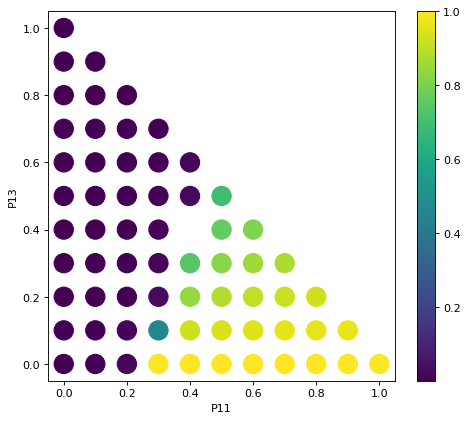

In [ ]:
eps = 0.005
new_preferences = [[0.2, 0.8], [0, 0.5], [p21, p21-eps+tol], [p23, p23-eps+tol]]
new_df = compose_dataset(step=eps, preferences=new_preferences)

NameError: name 'p21' is not defined

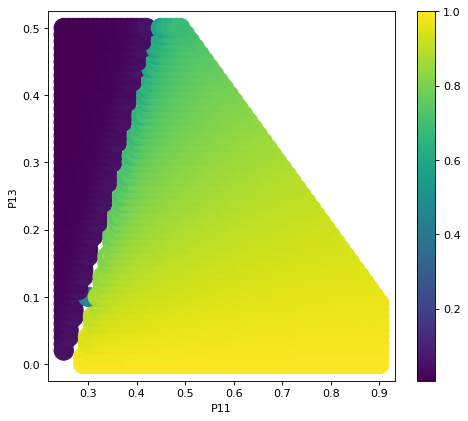

In [ ]:
visualize(new_df, [params["p21"], params["p23"]])

In [ ]:
def select_area(df, M):
    """
    returns area with alike market segmentation.

    """
    return df.loc[abs(df["M1"] - M) < 0.07]

In [ ]:
areas = select_area(new_df, Final_Part).drop(columns=['M2']).copy()
areas

P11   P13  P21  P23        M1        M2
468   0.31  0.07  0.3  0.1  0.902696  0.035614
535   0.32  0.08  0.3  0.1  0.901920  0.030197
601   0.32  0.09  0.3  0.1  0.885404  0.038480
602   0.33  0.09  0.3  0.1  0.899527  0.026653
603   0.34  0.09  0.3  0.1  0.908167  0.020141
...    ...   ...  ...  ...       ...       ...
2273  0.54  0.42  0.3  0.1  0.771489  0.018061
2274  0.55  0.42  0.3  0.1  0.776463  0.016576
2275  0.56  0.42  0.3  0.1  0.781149  0.015287
2276  0.57  0.42  0.3  0.1  0.785582  0.014158
2308  0.56  0.43  0.3  0.1  0.775788  0.015926

[694 rows x 6 columns]

In [ ]:
def visualize_areas(areas):
    """
    Method that visualizes area of alike market segmentation.
    """
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_title(f"Level set")
    ax1.grid(linestyle='--')
    ax1.set_xlabel('P11')
    ax1.set_ylabel('P13')
    ax1.set_xlim((0, 1))
    ax1.set_ylim((0, 1))
    ax1.scatter(areas["P11"], areas["P13"], label='7% interval of given M level', c='g')
    ax1.legend()

    plt.show()

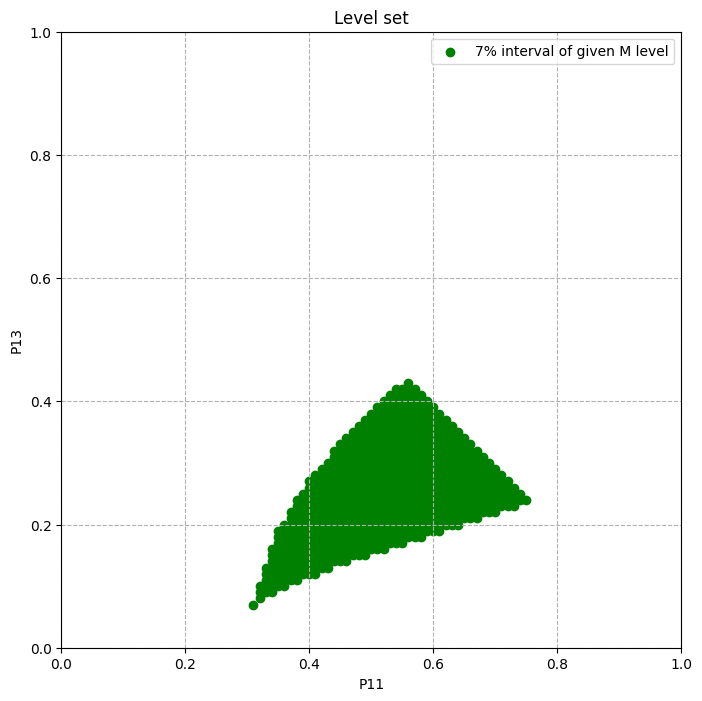

In [ ]:
visualize_areas(areas)

# Оценка экономической ситуации

Довольствие клиента обходится компании в 100 у.е. капитальных затрат на каждую сотню довольных клиентов (ступенчатая функция) и плюс 5 у.е. за каждого довольного клиента. Нейтральные клиенты обходятся в 1 у.е. за каждого нейтрального клиента. Недовольные клиенты обходятся в 4 у.е. за каждого недовольного.

In [ ]:
areas["cost"] = ((Total * areas["P11"] + 100) // 100) * 100 + Total * (areas["P11"] * 5  + areas["P13"] * 4 + 1 * (1 - areas["P11"] - areas["P11"]))

In [ ]:
areas.sort_values(by='cost').head()

P11   P13  P21  P23        M1        M2      cost
468  0.31  0.07  0.3  0.1  0.902696  0.035614  252100.0
535  0.32  0.08  0.3  0.1  0.901920  0.030197  260100.0
601  0.32  0.09  0.3  0.1  0.885404  0.038480  264100.0
602  0.33  0.09  0.3  0.1  0.899527  0.026653  268100.0
667  0.32  0.10  0.3  0.1  0.866452  0.049337  268100.0

Итак, оптимальной для минимизации издержек является пара $p_{11} = 0.35, p_{13} = 0.1,$ соответствующая "самой левой нижней" точки области. Логично, что при данной функции потерь (с фиксированной долей на рынке в диапазоне $\pm 7 \%$) выгоднее всего минимизировать число довольных и недовольных клиентов, делая бОльшую часть нейтральными.

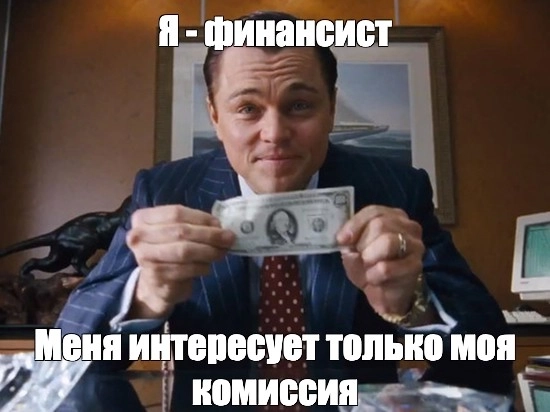